In [60]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_rows', 500)

## Data Preparation

## Johns Hopkins GITHUB csv data

In [61]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [62]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [63]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20',
       '9/9/20', '9/10/20', '9/11/20'],
      dtype='object', length=234)

In [64]:
time_idx=pd_raw.columns[4:]

In [65]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [66]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [67]:
len(pd_raw['Country/Region'].unique())

188

In [68]:
pd_raw[pd_raw['Country/Region']=='US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
242,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,6113510,6150016,6200518,6244970,6276365,6300622,6327009,6360212,6396100,6443743


In [69]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [70]:
country_list=['India',
              'US',
              'France',
              'Germany',
              'Japan',
             ]

In [71]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

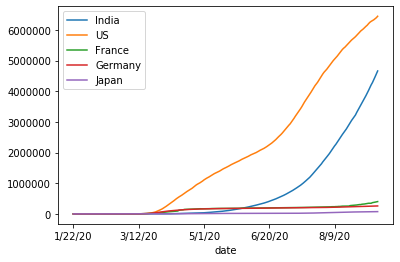

In [72]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [73]:
df_plot.head()

,date,India,US,France,Germany,Japan
0,1/22/20,0,1,0,0,2
1,1/23/20,0,1,0,0,2
2,1/24/20,0,2,2,0,2
3,1/25/20,0,2,3,0,2
4,1/26/20,0,5,3,0,4


In [74]:
df_plot.date[0]

'1/22/20'

In [75]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [76]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [77]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [78]:
df_plot['date']=time_idx
type(df_plot['date'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [79]:
df_plot.head()

,date,India,US,France,Germany,Japan
0,2020-01-22,0,1,0,0,2
1,2020-01-23,0,1,0,0,2
2,2020-01-24,0,2,2,0,2
3,2020-01-25,0,2,3,0,2
4,2020-01-26,0,5,3,0,4


In [80]:
df_plot.to_csv('C:/Users/saudf/ads_covid-19/data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

In [81]:
data_path='C:/Users/saudf/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [82]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [83]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,no,Albania,0,0,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,no,Algeria,0,0,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,no,Andorra,0,0,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [84]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [85]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [86]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [87]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [88]:
pd_relational_model.to_csv('C:/Users/saudf/ads_covid-19/data/processed/COVID_relational_confirmed.csv',sep=';' , index=False)

In [89]:
pd_JH_data=pd.read_csv('C:/Users/saudf/ads_covid-19/data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,"Korea, South",1.0
2,2020-01-22,no,Kosovo,0.0
3,2020-01-22,no,Kuwait,0.0
4,2020-01-22,no,Kyrgyzstan,0.0
...,...,...,...,...
62239,2020-09-11,no,Barbados,180.0
62240,2020-09-11,no,Belarus,73784.0
62241,2020-09-11,no,Belgium,91537.0
62242,2020-09-11,no,Albania,11021.0


In [90]:
test_data=pd_JH_data[((pd_JH_data['country']=='India')|
                      (pd_JH_data['country']=='US'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [91]:
test_data

,date,state,country,confirmed
15749,2020-03-21,no,India,330.0
15776,2020-03-21,no,US,24508.0
16015,2020-03-22,no,India,396.0
16041,2020-03-22,no,US,33152.0
16290,2020-03-23,no,India,499.0
16309,2020-03-23,no,US,43850.0
16547,2020-03-24,no,India,536.0
16574,2020-03-24,no,US,54112.0
16813,2020-03-25,no,India,657.0
16840,2020-03-25,no,US,66055.0


In [92]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
India,2020-09-11,no,4659984.0
US,2020-09-11,no,6443743.0


In [93]:
# %load C:\Users\saudf\ads_covid-19\src\features\build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

In [94]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    India   2020-09-11  4659984.0
      US      2020-09-11  6443743.0

In [95]:
#this command will only work when adapting the get_doubling_time_via_regression function
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [96]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [97]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     India    15749           NaN
                16015           NaN
                16290      4.832347
                16547      6.814286
                16813      7.139241
                17080      6.701571
                17345      6.582609
                17611      6.669231
                17877     14.102190
                18142      8.237374
                18409      6.563003
                18675      4.146363
                18940      3.454334
                19207      8.328061
                19473     10.132344
                19739      6.031342
                20005      4.500000
                20280      5.291933
                20537      9.376098
                20803      8.463932
                21070      8.021799
                21336      8.820066
                21601     10.474590
                21867      9.335326
                22133      9.098744
                22399     12.221152
                22665     12.777149
      

In [98]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [99]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN


In [100]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0.0
1,1,2020-01-22,no,"Korea, South",1.0
2,2,2020-01-22,no,Kosovo,0.0
3,3,2020-01-22,no,Kuwait,0.0
4,4,2020-01-22,no,Kyrgyzstan,0.0


In [101]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')

In [102]:
pd_result_larg[pd_result_larg['country']=='India']

,index,date,state,country,confirmed,confirmed_DR
56,56,2020-01-22,no,India,0.0,NaN
320,320,2020-01-23,no,India,0.0,NaN
588,588,2020-01-24,no,India,0.0,NaN
853,853,2020-01-25,no,India,0.0,NaN
1119,1119,2020-01-26,no,India,0.0,NaN
1394,1394,2020-01-27,no,India,0.0,NaN
1651,1651,2020-01-28,no,India,0.0,NaN
1917,1917,2020-01-29,no,India,0.0,NaN
2183,2183,2020-01-30,no,India,1.0,0.666667
2450,2450,2020-01-31,no,India,1.0,1.333333


## Filtering the data with groupby apply

In [103]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [104]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [105]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1.0,NaN,0.8
2,2,2020-01-22,no,Kosovo,0.0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0.0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0


## Filtered doubling rate

In [106]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
62239,no,Zimbabwe,61008,54.005632
62240,no,Zimbabwe,61244,59.266556
62241,no,Zimbabwe,61540,57.891362
62242,no,Zimbabwe,61776,86.275083
62243,no,Zimbabwe,62243,174.522248


In [107]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
62239,62239,2020-09-11,no,Barbados,180.0,inf,180.2,900.000000
62240,62240,2020-09-11,no,Belarus,73784.0,385.300175,73781.0,389.582319
62241,62241,2020-09-11,no,Belgium,91537.0,98.156735,91333.8,130.170185
62242,62242,2020-09-11,no,Albania,11021.0,68.527865,11016.2,70.673390
62243,62243,2020-09-11,no,Zimbabwe,7479.0,298.146667,7494.8,174.522248


In [108]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)

In [109]:
pd_result_larg[pd_result_larg['country']=='India'].tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
60968,60968,2020-09-07,no,India,4280422.0,50.412222,4286967.4,47.930813
61235,61235,2020-09-08,no,India,4370128.0,51.778441,4376688.0,48.103046
61500,61500,2020-09-09,no,India,4465863.0,47.153948,4467762.2,48.421074
61767,61767,2020-09-10,no,India,4562414.0,46.453044,4562903.2,47.999495
62033,62033,2020-09-11,no,India,4659984.0,47.009377,4658044.2,47.959378


In [110]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)